In [1]:
%load_ext autoreload
%autoreload 2

# Generación de datos

In [ ]:
from src.data_gen import generate_instances

instances = generate_instances(filename="TSP50.pkl", instance_count=100, cities=50, seed=42)

In [ ]:
from src.data_gen import generate_train_data

generate_train_data(instance_file="TSP50.pkl", data_filename="TSP50_data.pkl")

# Entrenamiento

In [108]:
from src.training import load_data

dataset = load_data(file_path="TSP50_data.pkl")

In [112]:
from src.models.transformer import TSPTransformer

# Parámetros del modelo
input_dim = 2
embed_dim = 32
num_heads = 4
head_dim = 32
num_layers = 2
dropout = 0.1

# Crear modelo
model = TSPTransformer(
    input_dim=input_dim,
    embed_dim=embed_dim,
    num_heads=num_heads,
    num_layers=num_layers,
    dropout_rate=dropout
)

In [113]:
from src.training import train

epochs = 100
train_size = 2400
test_size = 600
batch_size = 32
learning_rate = 1e-4
seed = 42

stats = train(model, dataset, epochs, train_size, test_size, batch_size, learning_rate, seed)

Usando dispositivo: cpu
Epoch 1/100 - Train Loss: 3.8477, Train Accuracy: 12.00% - Val Loss: 3.8115, Val Accuracy: 17.00%
Epoch 2/100 - Train Loss: 3.8087, Train Accuracy: 18.71% - Val Loss: 3.7641, Val Accuracy: 26.67%
Epoch 3/100 - Train Loss: 3.7856, Train Accuracy: 22.29% - Val Loss: 3.7718, Val Accuracy: 27.00%
Epoch 4/100 - Train Loss: 3.7678, Train Accuracy: 25.29% - Val Loss: 3.7537, Val Accuracy: 29.67%
Epoch 5/100 - Train Loss: 3.7646, Train Accuracy: 25.08% - Val Loss: 3.7569, Val Accuracy: 30.67%
Epoch 6/100 - Train Loss: 3.7464, Train Accuracy: 27.75% - Val Loss: 3.7158, Val Accuracy: 38.00%
Epoch 7/100 - Train Loss: 3.6964, Train Accuracy: 36.96% - Val Loss: 3.6729, Val Accuracy: 43.67%
Epoch 8/100 - Train Loss: 3.6689, Train Accuracy: 41.58% - Val Loss: 3.6620, Val Accuracy: 43.17%
Epoch 9/100 - Train Loss: 3.6653, Train Accuracy: 40.67% - Val Loss: 3.6446, Val Accuracy: 47.83%
Epoch 10/100 - Train Loss: 3.6479, Train Accuracy: 44.17% - Val Loss: 3.6358, Val Accuracy: 49

In [114]:
from src.training import save_model
save_model(model, filename="model2.pth")

# Validación

Predicted cost: 6.207884033190094


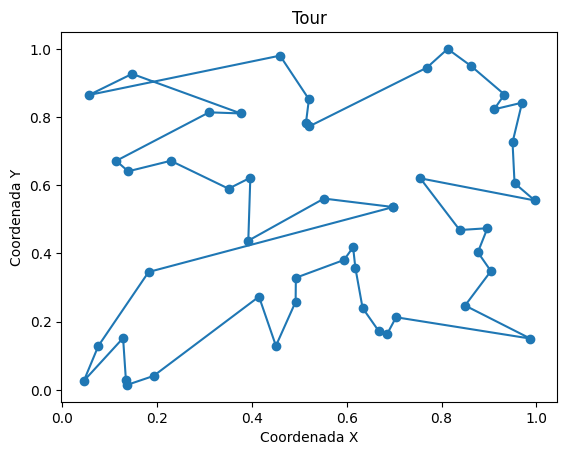

In [ ]:
from src.solvers.model import ModelSolver

model_solver = ModelSolver(model)
model_sol = model_solver.solve(instance_file="TSP50.pkl", instance_number=0)

print("Predicted cost:", model_sol.cost)
model_sol.plot()

Optimal cost: 5.393124245897437


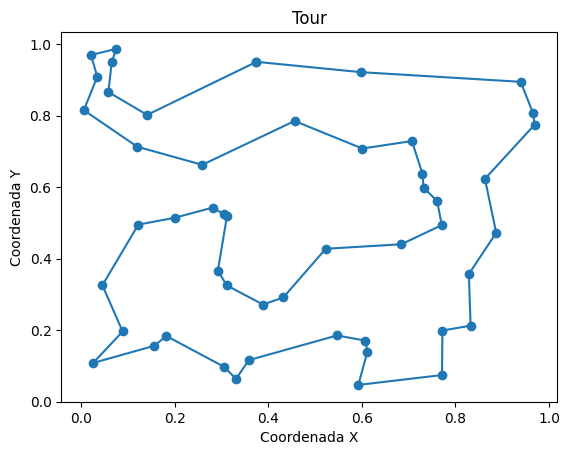

In [123]:
from src.data_gen import read_instances
from src.solvers.ortools import solve

instances = read_instances("TSP50.pkl")
instance = instances[0]
ortools_sol = solve(instance)
print("Optimal cost:", ortools_sol.cost)
ortools_sol.plot()

In [126]:
from src.solvers.ortools import solve
from src.solvers.model import ModelSolver

instances = read_instances("benchmarks/b50.pkl")
model_costs = []
opt_costs = []

model_solver = ModelSolver(model)

for i, instance in enumerate(instances):
    model_sol = model_solver.solve(instance_file="benchmarks/b50.pkl", instance_number=i)
    ortools_sol = solve(instance)

    model_costs.append(model_sol.cost)
    opt_costs.append(ortools_sol.cost)

print("Avg gap (%):", sum((mc - oc) / oc * 100 for mc, oc in zip(model_costs, opt_costs)) / len(opt_costs))

Avg gap (%): 15.512271374070437
